<a href="https://colab.research.google.com/github/Saichandu47/Sentiment-Analysis-of-Movie-Reviews/blob/main/Sentiment_Analysis_for_Movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pattipatisaichandu","key":"8d0cd73bd381a7642b129f736f4a9f67"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d yasserh/imdb-movie-ratings-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis
License(s): CC0-1.0
 24% 5.00M/20.6M [00:00<00:00, 30.4MB/s]
100% 20.6M/20.6M [00:00<00:00, 91.9MB/s]


In [6]:
!unzip imdb-movie-ratings-sentiment-analysis.zip

Archive:  imdb-movie-ratings-sentiment-analysis.zip
  inflating: movie.csv               


In [17]:
#importing libraries
import numpy as np
import pandas as pd


In [8]:
#Reading data
df=pd.read_csv('movie.csv')

In [9]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [10]:
df.shape

(40000, 2)

In [11]:
df.value_counts('label')

,count
label,
0,20019
1,19981


In [12]:
df.isnull().sum()

,0
text,0
label,0


TEXT CLASSIFICATION USING SPACY

In [13]:
#importing spacy
import spacy
nlp=spacy.load('en_core_web_sm')

Doing Lemmatization and Removing Stop Words

In [14]:
def preprocess(text):
    text = text.lower()
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [18]:
#preprocessing the text
df['preprocessed_text']=df['text'].apply(preprocess)

In [19]:
df['label'].value_counts()

,count
label,
0,20019
1,19981


Balancing the data

In [20]:
df_neg_downsampled=df[df['label']==0].sample(df['label'].value_counts()[1])

In [21]:
df_bal=pd.concat([df_neg_downsampled,df[df['label']==1]])

In [22]:
df_bal['label'].value_counts()

,count
label,
0,19981
1,19981


In [23]:
df_bal.head()

,text,label,preprocessed_text
15897,I felt as though the two hours I spent watchin...,0,feel hour spend watch film well serve go local...
22362,this is the most overrated show on television....,0,overrated television believe people continue w...
11398,Steven Seagal played in many action movies. Mo...,0,steven seagal play action movie bad bad patrio...
36751,"Yes, he is! ...No, not because of Pintilie lik...",0,yes pintilie like undress actor publicly privy...
21415,Unless you are petrified of Russian people or ...,0,petrify russian people boar movie snoref actua...


Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_bal.preprocessed_text,df_bal.label,test_size=0.2,random_state=2022,stratify=df_bal.label)

In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31969,) (7993,) (31969,) (7993,)


In [26]:
#importing required models
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

Classification using Logistic regression

In [27]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer(ngram_range=(1,2))),
    ('classifier',LogisticRegression())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

In [28]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3996
           1       0.87      0.91      0.89      3997

    accuracy                           0.89      7993
   macro avg       0.89      0.89      0.89      7993
weighted avg       0.89      0.89      0.89      7993



Classification using Random Forest Classifier

Text(70.72222222222221, 0.5, 'Truth')

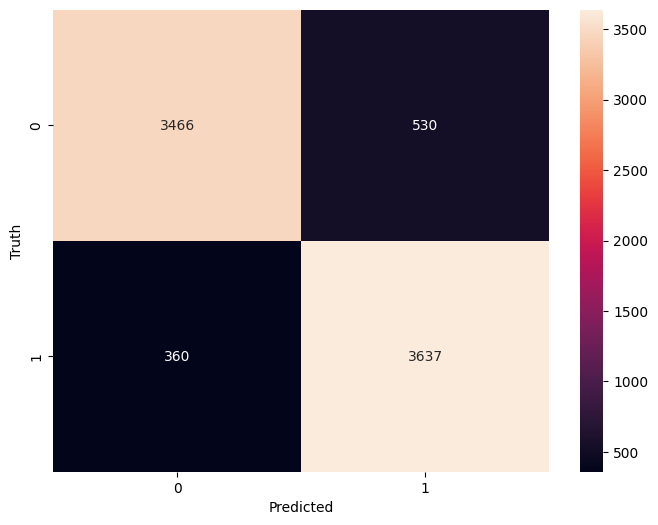

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer(ngram_range=(1,2))),
    ('classifier',RandomForestClassifier())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier())])

In [33]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3996
           1       0.86      0.84      0.85      3997

    accuracy                           0.86      7993
   macro avg       0.86      0.86      0.86      7993
weighted avg       0.86      0.86      0.86      7993



Classification using Naive Bayes

In [34]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer(ngram_range=(1,2))),
    ('classifier',MultinomialNB())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [35]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3996
           1       0.88      0.87      0.88      3997

    accuracy                           0.88      7993
   macro avg       0.88      0.88      0.88      7993
weighted avg       0.88      0.88      0.88      7993



Text Classification using nltk

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Balancing the data

In [38]:
df_neg_downsampled=df[df['label']==0].sample(df['label'].value_counts()[1])

In [39]:
df_bal=pd.concat([df_neg_downsampled,df[df['label']==1]])

In [40]:
df_bal['label'].value_counts()

,count
label,
0,19981
1,19981


 Stemming the Data and removing stop words

In [41]:
port_stem=PorterStemmer()

In [42]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [44]:
df_bal['stemmed_content']=df['text'].apply(stemming)

In [45]:
df_bal.head()

,text,label,preprocessed_text,stemmed_content
24063,Frankly I'm rather incensed that on the basis ...,0,frankly incense basis dazzle review attribute ...,frankli rather incens basi dazzl review attrib...
8372,While William Shater can always make me smile ...,0,william shater smile appear especially love de...,william shater alway make smile anyth appear e...
31774,"Every movie from the thirties is dated, but if...",0,movie thirty date watch john ford movie dated ...,everi movi thirti date watch john ford movi wo...
10414,Story of the creation of Underdog and adventur...,0,story creation underdog adventure battle simon...,stori creation underdog adventur battl simon b...
5039,"Don't get me wrong, this is a terrible, cliché...",0,wrong terrible clichéd film delight fan olivia...,get wrong terribl clich film delight fan olivi...


Splitting the data into train and test

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_bal.stemmed_content,df_bal.label,test_size=0.2,random_state=2022,stratify=df_bal.label)

In [47]:
X_train.head()

,stemmed_content
23037,john van druten bell book candl delight unexpe...
13145,loos intend satir w griffith intoler three age...
34576,movi like music video kusturica said interview...
21710,scarecrow seem botch horror meet supernatur fi...
4752,one say warn read review user extern like us a...


Classification using naive bayes

In [48]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer(ngram_range=(1,2))),
    ('classifier',MultinomialNB())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [49]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3996
           1       0.89      0.87      0.88      3997

    accuracy                           0.88      7993
   macro avg       0.88      0.88      0.88      7993
weighted avg       0.88      0.88      0.88      7993



Classification using Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer(ngram_range=(1,2))),
    ('classifier',LogisticRegression())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

In [52]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3996
           1       0.88      0.91      0.89      3997

    accuracy                           0.89      7993
   macro avg       0.89      0.89      0.89      7993
weighted avg       0.89      0.89      0.89      7993



Confusion Matrix For Logistic Regression model

Text(70.72222222222221, 0.5, 'Truth')

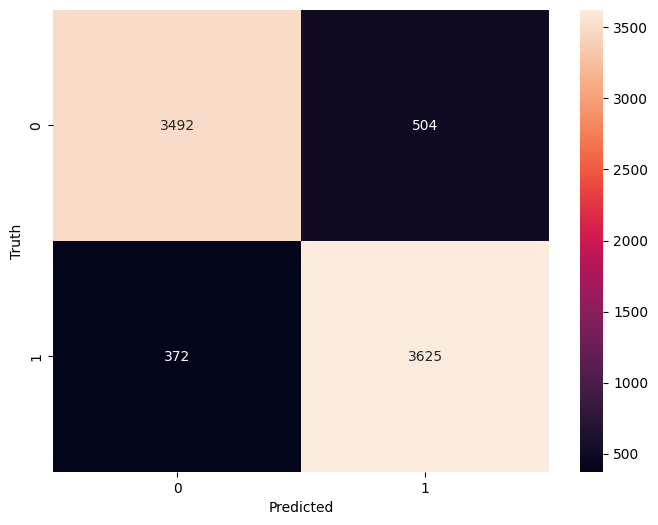

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Xgboost

In [55]:
import xgboost as xgb

In [56]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer(ngram_range=(1,2))),
    ('classifier',xgb.XGBClassifier())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [57]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3996
           1       0.85      0.87      0.86      3997

    accuracy                           0.85      7993
   macro avg       0.85      0.85      0.85      7993
weighted avg       0.85      0.85      0.85      7993

